In [41]:
%run ../train.py

usage: train.py [-h] --config CONFIG
train.py: error: the following arguments are required: --config


SystemExit: 2

In [42]:
import os
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch.nn.functional as F
from utils.skipgram_model import SkipGramModel

In [43]:
model_dir = '../weights/skipgram_wikitext-103-v1'
model_path = os.path.join(model_dir, "model.pth")
vocab_path = os.path.join(model_dir, "vocab.pt")

In [44]:
vocab = torch.load(vocab_path)
model = torch.load(model_path, weights_only=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()

SkipGramModel(
  (embedding): Embedding(49525, 100)
  (linear): Linear(in_features=100, out_features=49525, bias=True)
)

In [45]:
with torch.no_grad():
    embeddings = model.embedding.weight.cpu().clone()

In [46]:
def get_vec(word):
    idx = vocab.get(word, vocab["<unk>"])
    return embeddings[idx]

analogy_vec = get_vec("king") - get_vec("man") + get_vec("woman")

queen_vec = get_vec("queen")
sim = F.cosine_similarity(
    analogy_vec.unsqueeze(0), 
    queen_vec.unsqueeze(0)
).item()

print(f"Similarity(king - man + woman, queen) = {sim:.4f}")

Similarity(king - man + woman, queen) = 0.0691


In [47]:
N = 100
idx_to_word = {idx: tok for tok, idx in vocab.items()}

subset_embeddings = embeddings[:N]
subset_words = [idx_to_word[i] for i in range(N)]

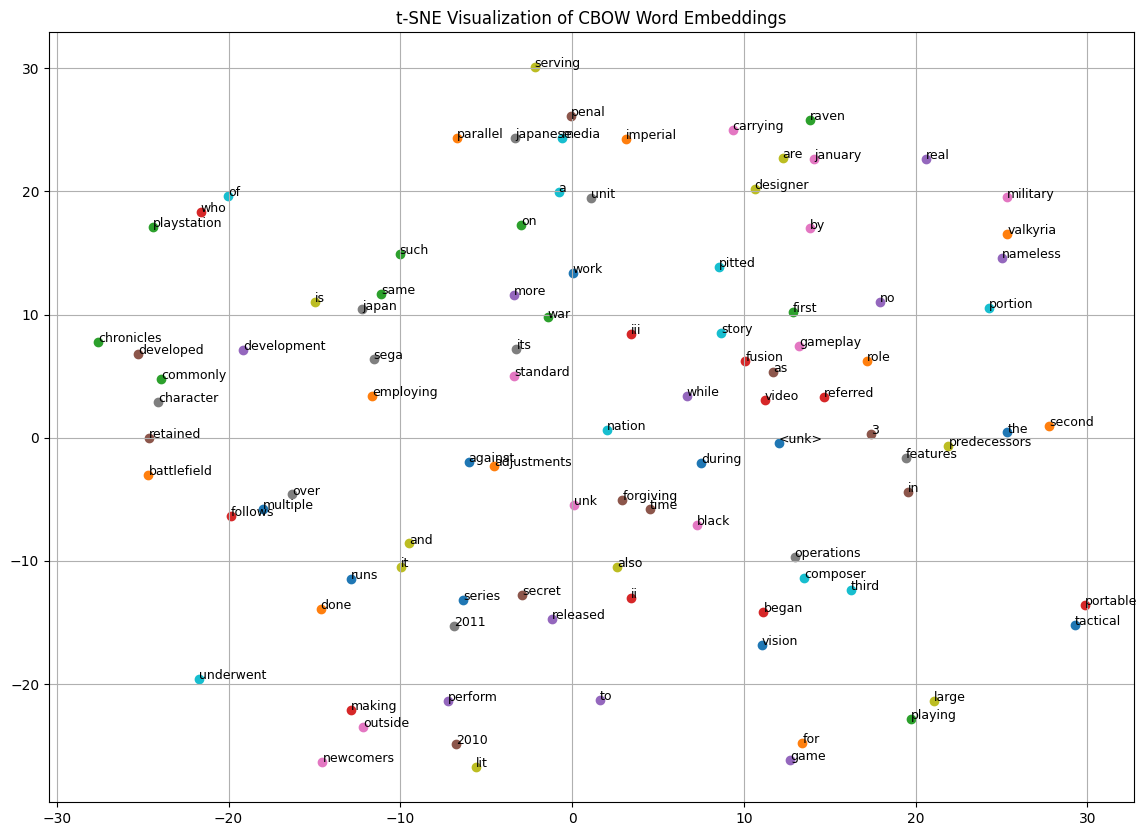

In [48]:
tsne = TSNE(
    n_components=2,
    init='pca',
    random_state=42,
    learning_rate='auto',
    perplexity=5
)
reduced = tsne.fit_transform(subset_embeddings)

plt.figure(figsize=(14, 10))
for i, word in enumerate(subset_words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.annotate(word, (x, y), fontsize=9)
plt.title("t-SNE Visualization of CBOW Word Embeddings")
plt.grid(True)
plt.show()
